In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

unicef = pd.read_csv('stud_math (1).xls')

In [187]:
unicef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

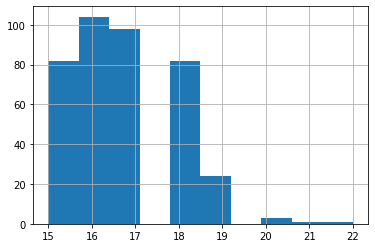

In [188]:
# проведем первичный анализ, первым делом рассмотрев все числовые столбцы

# Возраст учеников

unicef.age.hist()
unicef.age.describe()

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


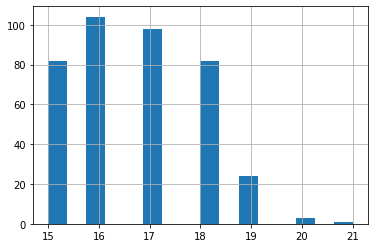

In [189]:
# проверим возраст учеников на наличии выбросов 

IQR_age = unicef.age.quantile(0.75) - unicef.age.quantile(0.25)
perc25_age = unicef.age.quantile(0.25)
perc75_age = unicef.age.quantile(0.75)

print(
'25-й перцентиль: {},'.format(perc25_age),
'75-й перцентиль: {},'.format(perc75_age),
"IQR: {}, ".format(IQR_age),
"Границы выбросов: [{f}, {l}].".format(f=perc25_age - 1.5*IQR_age, l=perc75_age + 1.5*IQR_age))

unicef.age.loc[unicef.age.between(
perc25_age - 1.5*IQR_age,
perc75_age + 1.5*IQR_age)].hist(bins = 16, label = 'IQR')

In [190]:
# присутствует выброс (ученик возрастом 22 года) - исключим его из датасета

unicef = unicef.loc[unicef.age.between(perc25_age - 1.5*IQR_age, perc75_age + 1.5*IQR_age)]
unicef.age.unique()

array([18, 17, 15, 16, 19, 20, 21])

(array([281.,  88.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36., 40.]),
 <a list of 10 Patch objects>)

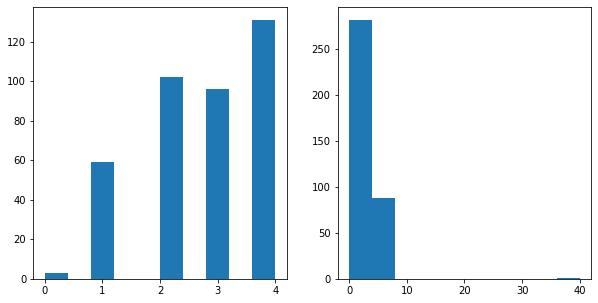

In [192]:
# проверим образование отца и матери

fig, axes = plt.subplots(1,2,figsize = (10,5))

axes[0].hist(unicef['Medu'])
axes[1].hist(unicef['Fedu'])

# как мы видим в столбце Fedu имеется выброс (значение 40)

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].


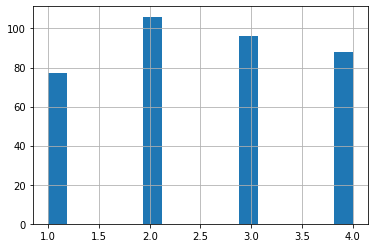

In [193]:
# проверим столбец Fedu на выбросы и исключим из датасета

IQR_fedu = unicef.Fedu.quantile(0.75) - unicef.Fedu.quantile(0.25)
perc25_fedu = unicef.Fedu.quantile(0.25)
perc75_fedu = unicef.Fedu.quantile(0.75)

print(
'25-й перцентиль: {},'.format(perc25_fedu),
'75-й перцентиль: {},'.format(perc75_fedu),
"IQR: {}, ".format(IQR_fedu),
"Границы выбросов: [{f}, {l}].".format(f=perc25_fedu - 1.5*IQR_fedu, l=perc75_fedu + 1.5*IQR_fedu))

unicef.Fedu.loc[unicef.Fedu.between(
perc25_fedu - 1.5*IQR_fedu,
perc75_fedu + 1.5*IQR_fedu)].hist(bins = 16, label = 'IQR')

In [194]:
unicef = unicef.loc[unicef.Fedu.between(perc25_fedu - 1.5*IQR_fedu, perc75_fedu + 1.5*IQR_fedu)]
unicef.Fedu.unique()

array([4., 1., 2., 3.])

(array([276.,   0.,   0.,  45.,   0.,   0.,  14.,   0.,   0.,  14.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

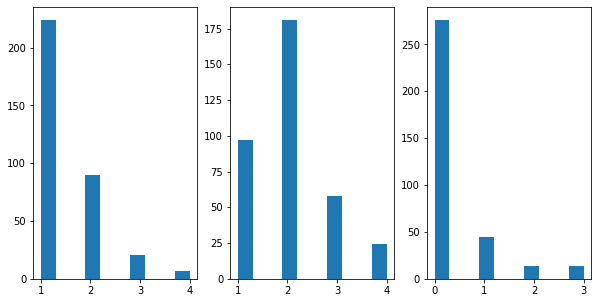

In [197]:
# проверим следующие столбцы: traveltime, studytime, failures

fig, axes = plt.subplots(1,3,figsize = (10,5))

axes[0].hist(unicef['traveltime'])
axes[1].hist(unicef['studytime'])
axes[2].hist(unicef['failures'])

# как мы видим на графиках все значения в пределах нормы

(array([349.,   4.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([  0. ,  38.5,  77. , 115.5, 154. , 192.5, 231. , 269.5, 308. ,
        346.5, 385. ]),
 <a list of 10 Patch objects>)

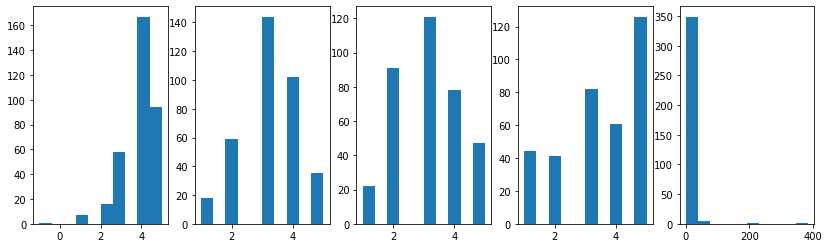

In [198]:
# проверим следующие столбцы:

fig, axes = plt.subplots(1,5,figsize = (14,4))

axes[0].hist(unicef['famrel']) 
axes[1].hist(unicef['freetime'])
axes[2].hist(unicef['goout'])
axes[3].hist(unicef['health'])
axes[4].hist(unicef['absences'])

# как мы видим на графиках есть нелогическое значение в колонке farmrel (-1) и выбросы в колонке absences
# исключим их из датафрейма чтобы они не искажали конечный результат 

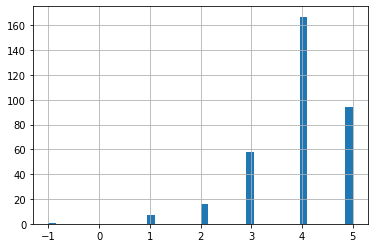

In [199]:
# посмотрим на столбец famrel поближе

unicef.famrel.hist(bins=40)

In [200]:
# исключим значение (-1) из farmrel

unicef = unicef.loc[unicef.famrel >= 0]

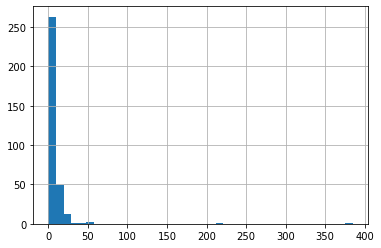

In [201]:
# посмотрим на столбец absences поближе и проверим границы выбросов и исключим их

unicef.absences.hist(bins=40)

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


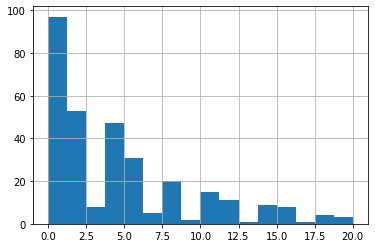

In [202]:
IQR_abs = unicef.absences.quantile(0.75) - unicef.absences.quantile(0.25)
perc25_abs = unicef.absences.quantile(0.25)
perc75_abs = unicef.absences.quantile(0.75)

print(
'25-й перцентиль: {},'.format(perc25_abs),
'75-й перцентиль: {},'.format(perc75_abs),
"IQR: {}, ".format(IQR_abs),
"Границы выбросов: [{f}, {l}].".format(f=perc25_abs - 1.5*IQR_abs, l=perc75_abs + 1.5*IQR_abs))

unicef.absences.loc[unicef.absences.between(
perc25_abs - 1.5*IQR_abs,
perc75_abs + 1.5*IQR_abs)].hist(bins = 16, label = 'IQR')

In [203]:
# исключим выбросы по колонке absences

unicef = unicef.loc[unicef.absences <= 20]
unicef

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,MS,F,18,U,GT3,T,1.0,1.0,other,other,course,mother,NaN,2.0,1.0,no,no,no,yes,yes,-6.0,yes,NaN,no,1.0,1.0,1.0,5.0,0.0,0.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


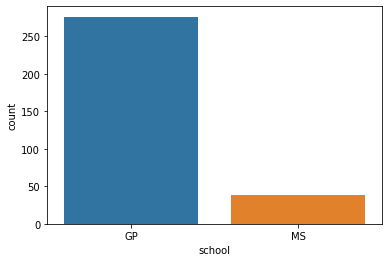

In [204]:
# проверим на графиках есть ли нелогические значения / ошибочные значения для 

sns.countplot(x = 'school', data = unicef)


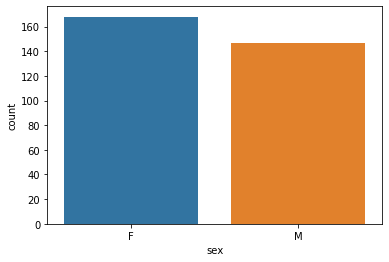

In [205]:
sns.countplot(x = 'sex', data = unicef)

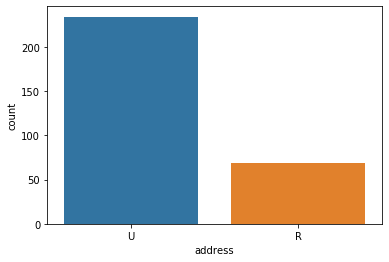

In [206]:
sns.countplot(x = 'address', data = unicef)

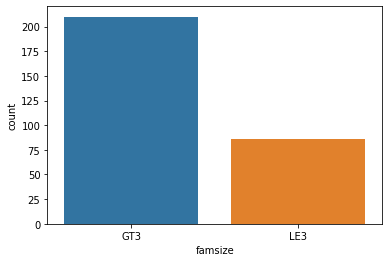

In [207]:
sns.countplot(x = 'famsize', data = unicef)

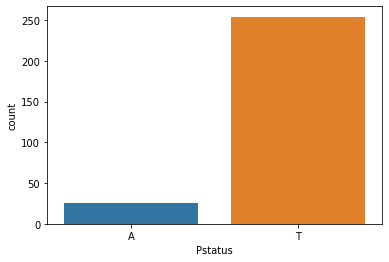

In [208]:
sns.countplot(x = 'Pstatus', data = unicef)

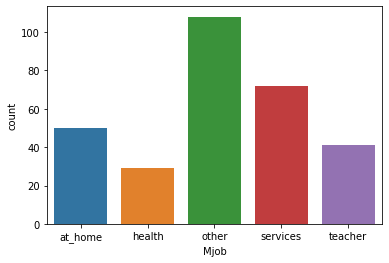

In [209]:
sns.countplot(x = 'Mjob', data = unicef)

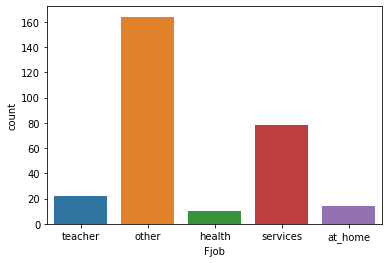

In [210]:
sns.countplot(x = 'Fjob', data = unicef)

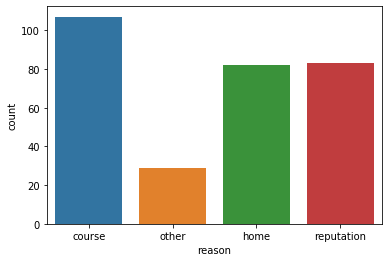

In [211]:
sns.countplot(x = 'reason', data = unicef)

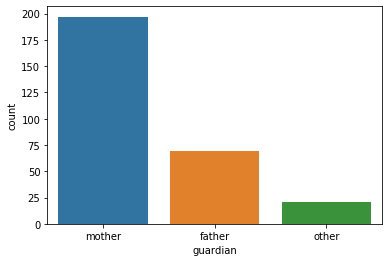

In [212]:
sns.countplot(x = 'guardian', data = unicef)

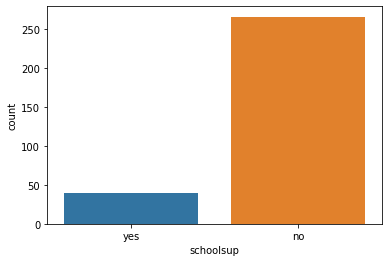

In [213]:
sns.countplot(x = 'schoolsup', data = unicef)

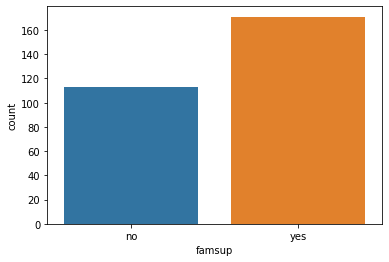

In [214]:
sns.countplot(x = 'famsup', data = unicef)

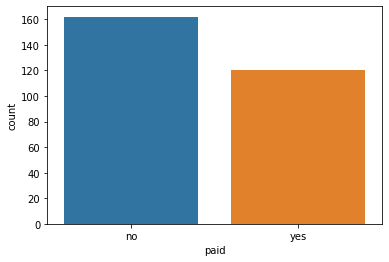

In [215]:
sns.countplot(x = 'paid', data = unicef)

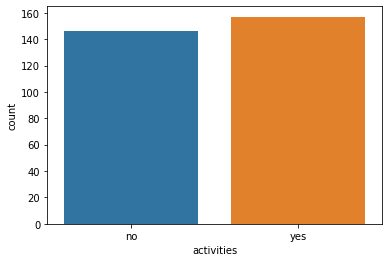

In [216]:
sns.countplot(x = 'activities', data = unicef)

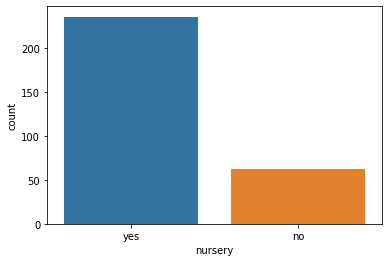

In [217]:
sns.countplot(x = 'nursery', data = unicef)

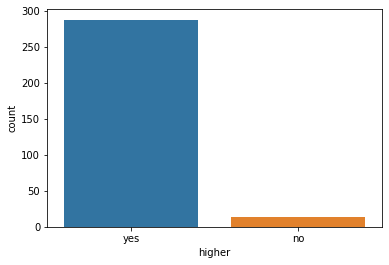

In [218]:
sns.countplot(x = 'higher', data = unicef)

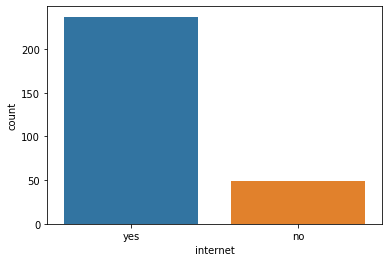

In [219]:
sns.countplot(x = 'internet', data = unicef)

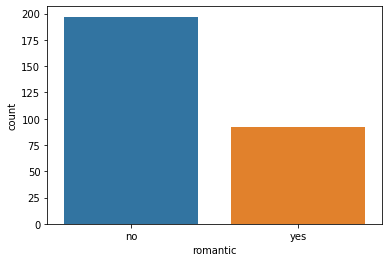

In [220]:
sns.countplot(x = 'romantic', data = unicef)

In [ ]:
# как мы видим - в номинативных колонках нет нелогических значений 

In [146]:
# для чистоты эксперимента (в своем личном понимании) 
# решил заменить все NaN значения в номинативных столбцах на значении моды (к сожалению не вышло написать функцию)

In [221]:
unicef['school'] = unicef['school'].fillna(unicef.school.mode().iloc[0])

In [222]:
unicef['sex'] = unicef['sex'].fillna(unicef.sex.mode().iloc[0])

In [223]:
unicef['address'] = unicef['address'].fillna(unicef.address.mode().iloc[0])

In [224]:
unicef['Pstatus'] = unicef['Pstatus'].fillna(unicef.Pstatus.mode().iloc[0])

In [225]:
unicef['Mjob'] = unicef['Mjob'].fillna(unicef.Mjob.mode().iloc[0])

In [226]:
unicef['Fjob'] = unicef['Fjob'].fillna(unicef.Fjob.mode().iloc[0])

In [227]:
unicef['reason'] = unicef['reason'].fillna(unicef.reason.mode().iloc[0])

In [228]:
unicef['guardian'] = unicef['guardian'].fillna(unicef.guardian.mode().iloc[0])

In [229]:
unicef['guardian'] = unicef['guardian'].fillna(unicef.guardian.mode().iloc[0])

In [230]:
unicef['schoolsup'] = unicef['schoolsup'].fillna(unicef.schoolsup.mode().iloc[0])

In [231]:
unicef['famsup'] = unicef['famsup'].fillna(unicef.famsup.mode().iloc[0])

In [232]:
unicef['paid'] = unicef['paid'].fillna(unicef.paid.mode().iloc[0])

In [233]:
unicef['activities'] = unicef['activities'].fillna(unicef.activities.mode().iloc[0])

In [234]:
unicef['nursery'] = unicef['nursery'].fillna(unicef.nursery.mode().iloc[0])

In [235]:
unicef['higher'] = unicef['higher'].fillna(unicef.higher.mode().iloc[0])

In [236]:
unicef['internet'] = unicef['internet'].fillna(unicef.internet.mode().iloc[0])

In [237]:
unicef['romantic'] = unicef['romantic'].fillna(unicef.romantic.mode().iloc[0])

In [106]:
unicef.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.184203,-0.198682,0.091122,0.011111,0.176880,-0.011111,0.040554,0.038963,0.075224,-0.046624,0.114406,-0.149242
Medu,-0.184203,1.000000,0.662436,-0.188630,0.090379,-0.250356,-0.090379,-0.031719,0.002185,0.050706,-0.074349,0.097418,0.207286
Fedu,-0.198682,0.662436,1.000000,-0.189272,0.015295,-0.277304,-0.015295,-0.043497,-0.011622,0.011683,-0.018496,0.002618,0.123074
traveltime,0.091122,-0.188630,-0.189272,1.000000,-0.119388,0.095483,0.119388,-0.046866,0.010320,0.011472,-0.010595,-0.049053,-0.072256
studytime,0.011111,0.090379,0.015295,-0.119388,1.000000,-0.130004,-1.000000,0.030875,-0.145716,-0.041539,-0.097797,-0.066978,0.119778
failures,0.176880,-0.250356,-0.277304,0.095483,-0.130004,1.000000,0.130004,0.016667,0.112262,0.064501,0.091341,0.033030,-0.313017
"studytime, granular",-0.011111,-0.090379,-0.015295,0.119388,-1.000000,0.130004,1.000000,-0.030875,0.145716,0.041539,0.097797,0.066978,-0.119778
famrel,0.040554,-0.031719,-0.043497,-0.046866,0.030875,0.016667,-0.030875,1.000000,0.170556,0.086651,0.098334,-0.068762,0.047389
freetime,0.038963,0.002185,-0.011622,0.010320,-0.145716,0.112262,0.145716,0.170556,1.000000,0.281201,0.084729,0.093320,0.045129
goout,0.075224,0.050706,0.011683,0.011472,-0.041539,0.064501,0.041539,0.086651,0.281201,1.000000,0.001201,0.047817,-0.121906


In [ ]:
# по итогам корреляции - для дальнейшей работы выбрал следующие столбцы: Medu, Fedu, studytime, absences

In [238]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data = unicef.loc[unicef.loc[:, column].isin(unicef.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

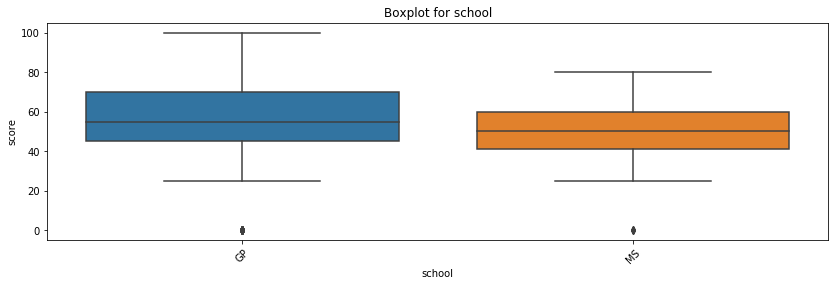

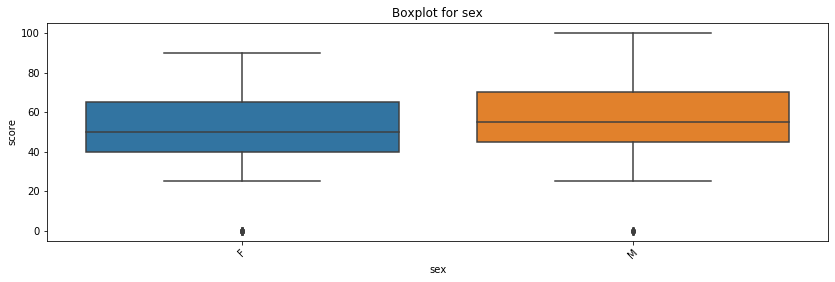

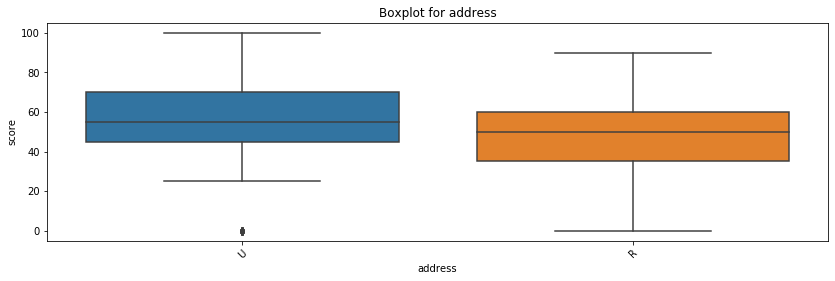

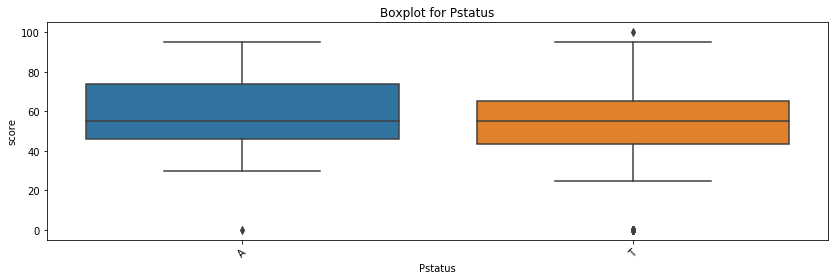

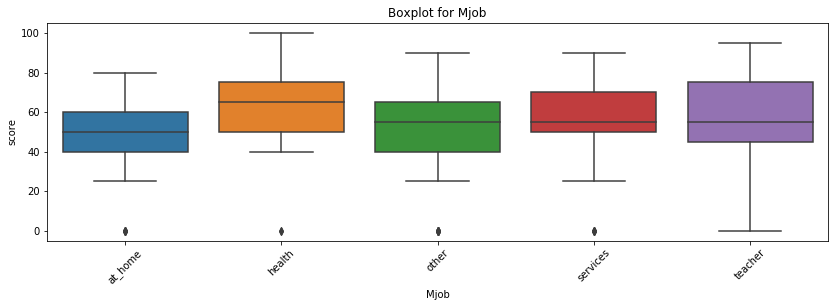

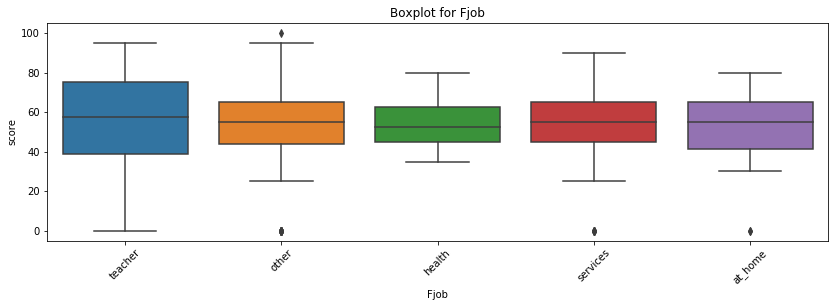

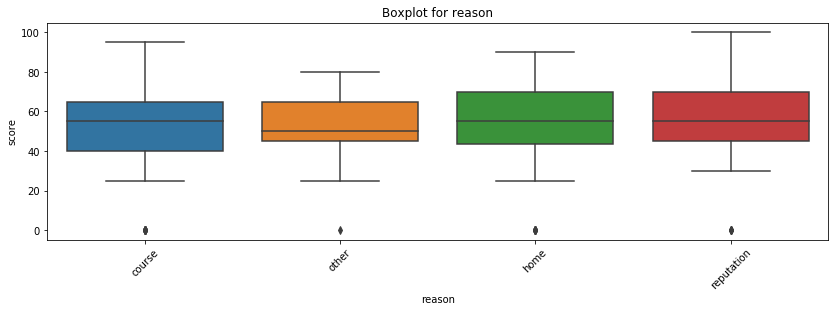

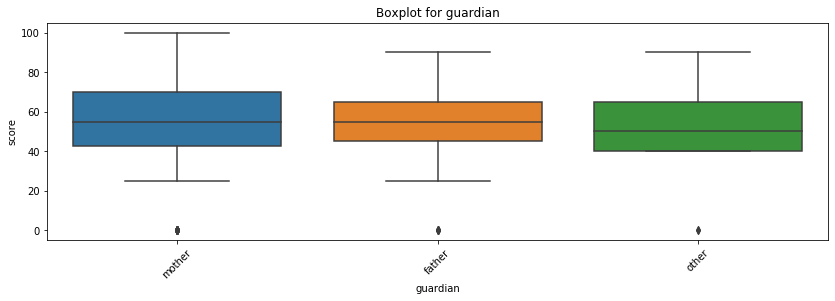

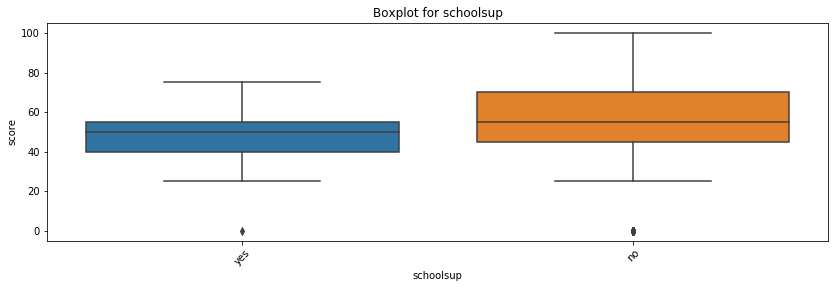

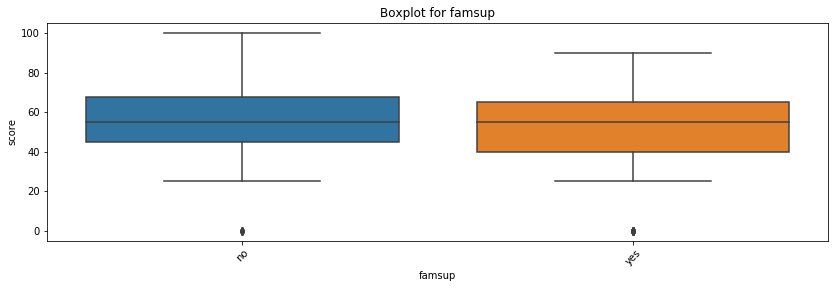

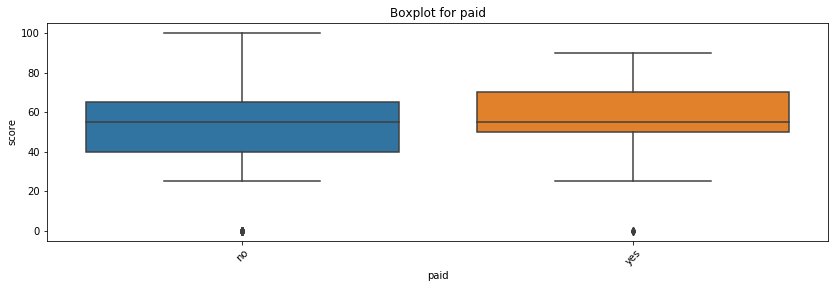

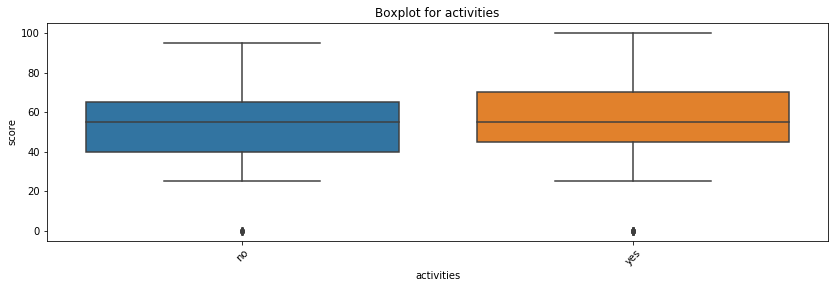

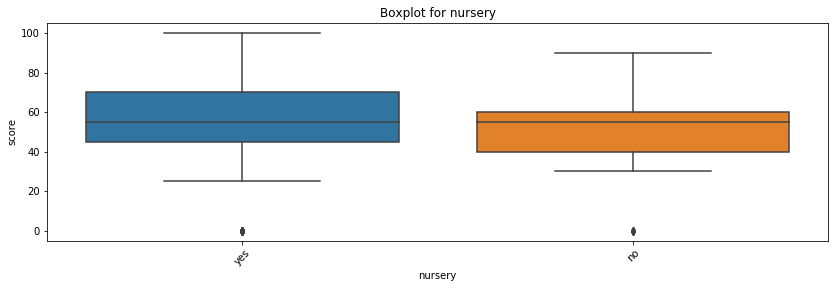

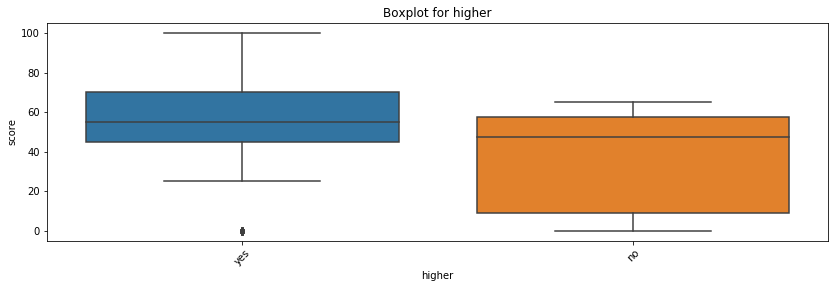

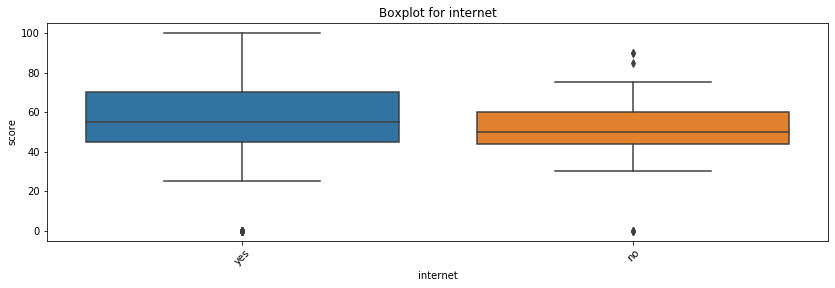

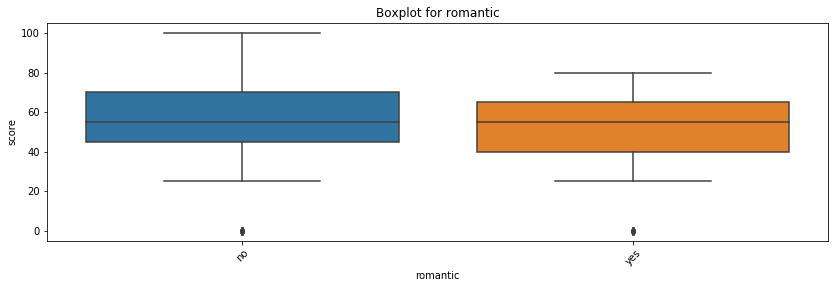

In [239]:
for col in ['school', 'sex', 'address', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

In [ ]:
# по графикам определил что для дальнейшей работы стоит использовать следующие колонки: 
#Mjob, Fjob, schoolsup, paid, higher, internet 

In [240]:
# создадим функцию для проверки номинативных переменных с помощью теста Стьюдента 
def get_stat_dif(column):
    cols = unicef.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(unicef.loc[unicef.loc[:, column] == comb[0], 'score'], 
                        unicef.loc[unicef.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.10/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

for col in ['school', 'sex', 'address', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)
    


In [241]:
# результат теста отрицательный - возможно повлиял тот факт что удалив выбросы мы повлияли на конечный результат

In [ ]:
# создадим новый датафрейм с показателями которые влияют на конечный результат (score)

In [ ]:
unicef_for_model = unicef.loc[:, ['Medu', 'Fedu', 'studytime', 'absences', 'Mjob', 'Fjob', 'schoolsup', 'paid']]
cacao_for_model.head()